EDA dilakukan untuk data sebelum imputasi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spku0 = pd.read_csv('/content/drive/MyDrive/SEM 7/Skripsweet <3/Colab/SKPU.csv')

In [4]:
spku0

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,01/01/2011,DKI1 (Bunderan HI),52,17,51,46,7,52,PM10,SEDANG
1,01/01/2011,DKI2 (Kelapa Gading),19,6,19,41,7,41,O3,BAIK
2,01/01/2011,DKI3 (Jagakarsa),---,5,7,76,2,76,O3,SEDANG
3,01/01/2011,DKI4 (Lubang Buaya),---,2,14,47,5,47,O3,BAIK
4,01/01/2011,DKI5 (Kebon Jeruk),---,---,---,---,---,0,NaN,TIDAK ADA DATA
...,...,...,...,...,...,...,...,...,...,...
20085,31/12/2021,DKI1 (Bunderan HI),62,52,23,20,14,85,PM25,SEDANG
20086,31/12/2021,DKI2 (Kelapa Gading),61,33,23,37,44,85,PM25,SEDANG
20087,31/12/2021,DKI3 (Jagakarsa),64,21,44,17,---,64,PM10,SEDANG
20088,31/12/2021,DKI4 (Lubang Buaya),58,36,21,---,22,90,PM25,SEDANG


In [5]:
# Convert 'tanggal' to datetime
spku0['tanggal'] = pd.to_datetime(spku0['tanggal'], format='%d/%m/%Y', errors='coerce')

# Define the pollutants
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

# Drop data for the years 2011 and 2012
spku = spku0[~spku0['tanggal'].dt.year.isin([2011, 2012])]

# Convert pollutant columns to numeric, coercing errors to NaN
spku[pollutants] = spku[pollutants].apply(pd.to_numeric, errors='coerce')

# Verify the result
print(spku.head())

        tanggal               stasiun  pm10  so2    co     o3   no2  max  \
3655 2013-01-01    DKI1 (Bunderan HI)  75.0  4.0  23.0   51.0   9.0   75   
3656 2013-01-01  DKI2 (Kelapa Gading)  45.0  3.0  27.0  135.0  10.0  135   
3657 2013-01-01      DKI3 (Jagakarsa)  32.0  NaN  20.0   30.0   4.0   32   
3658 2013-01-01   DKI4 (Lubang Buaya)  57.0  0.0  26.0   73.0   7.0   73   
3659 2013-01-01    DKI5 (Kebon Jeruk)   NaN  1.0  13.0   38.0   7.0   38   

     critical     categori  
3655     PM10       SEDANG  
3656       O3  TIDAK SEHAT  
3657     PM10         BAIK  
3658       O3       SEDANG  
3659       O3         BAIK  


<ipython-input-5-82f4b805f3bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spku[pollutants] = spku[pollutants].apply(pd.to_numeric, errors='coerce')


In [6]:
len(spku)

16435

# **Bar Plot Freq Tertinggi**

To show how many times for each pollutant is the daily critical pollutant. A critical pollutant is one that has the highest value on a given day.

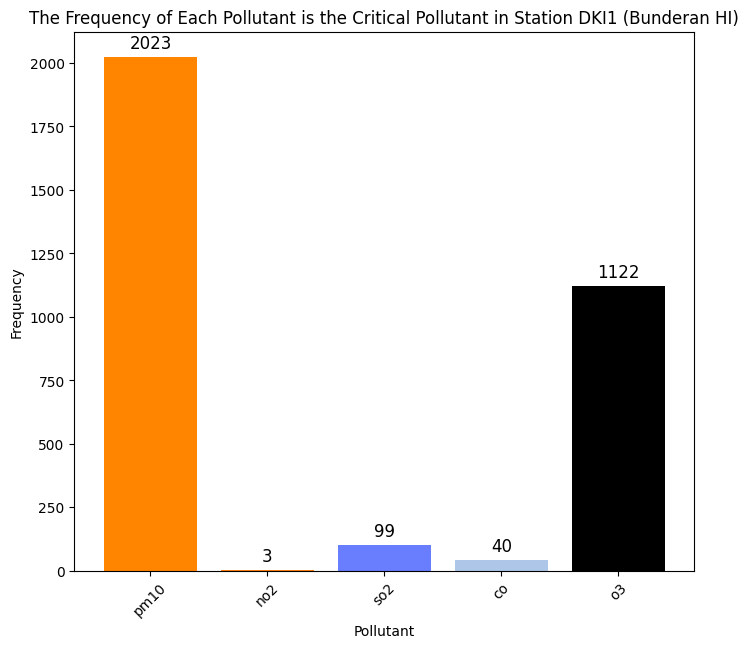

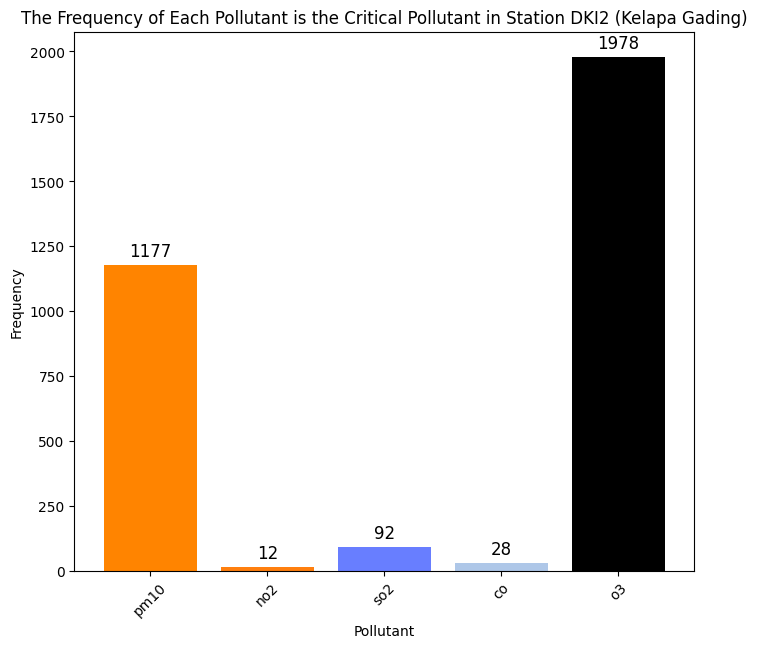

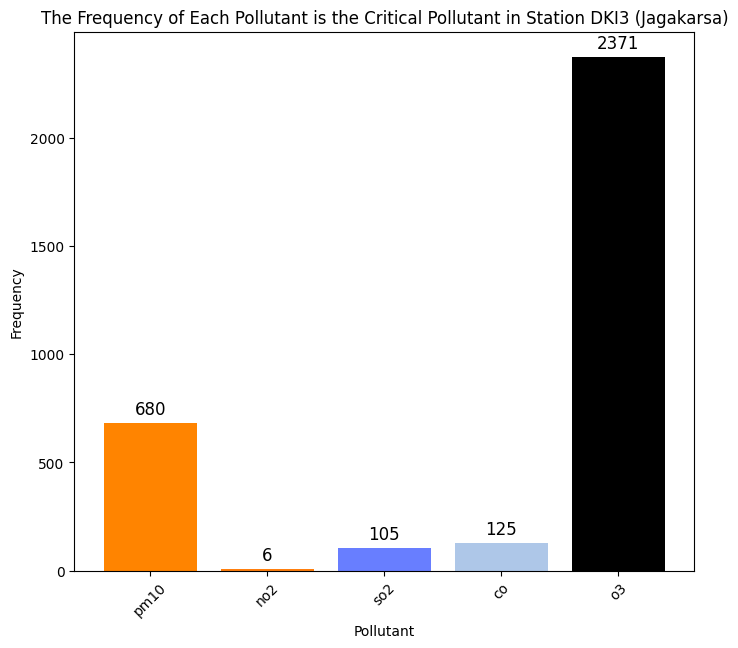

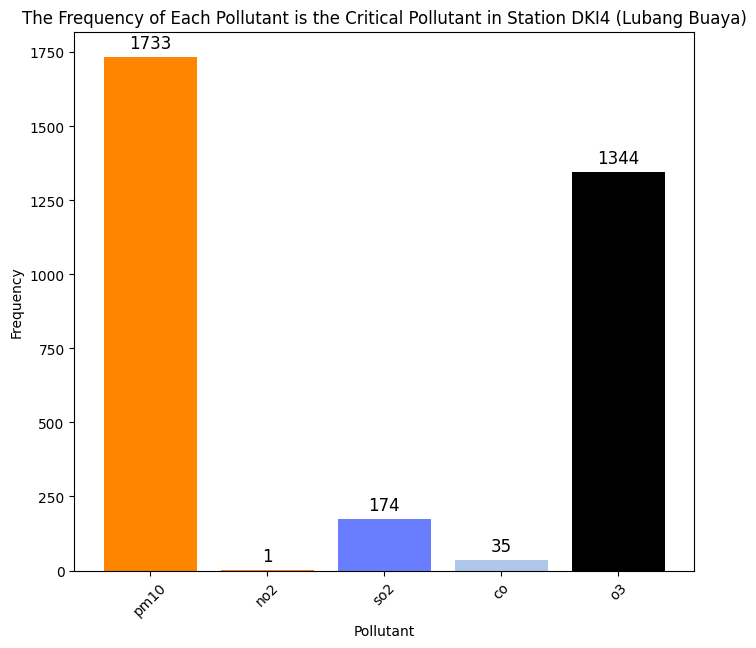

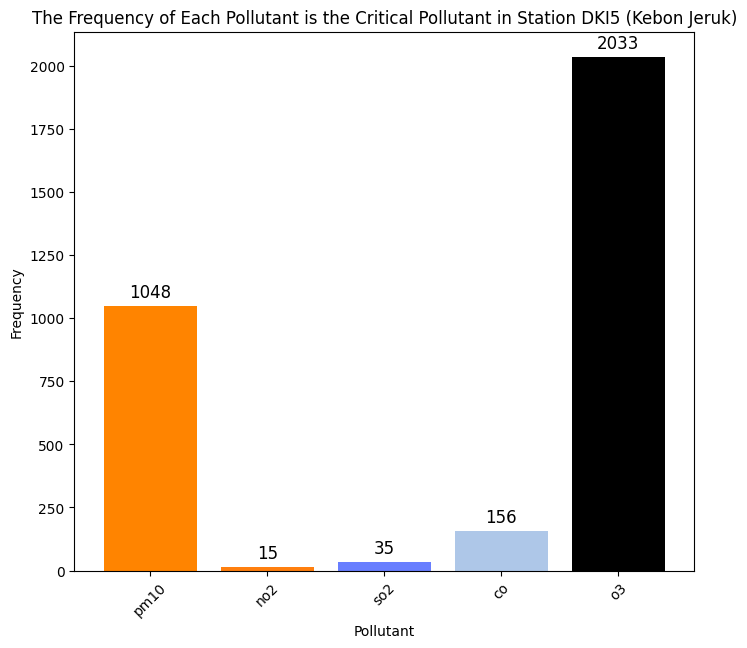

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = spku.copy()
# Change NaN into 0
df.fillna(0, inplace=True)

# Convert each column into numerical type
for col in ['pm10', 'so2', 'co', 'o3', 'no2']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Count for each parameter with highest ISPU in a day
df['highest_ispu'] = df[['pm10', 'so2', 'co', 'o3', 'no2']].idxmax(axis=1)

# Count for each station
freq_df = df.groupby('stasiun')['highest_ispu'].value_counts().unstack().fillna(0)

order = ['pm10', 'no2', 'so2', 'co', 'o3']
freq_df = freq_df[order]

colors = {
    'pm10': '#FF8400',
    'no2': '#FF7F0E',
    'so2': '#687EFF',
    'o3': '#000000',
    'co': '#AEC7E8'
}

for stasiun in freq_df.index:
    plt.figure(figsize=(8, 7))
    ax = freq_df.loc[stasiun].plot(kind='bar', color=[colors[col] for col in freq_df.columns], width=0.8)  # Mengatur lebar bar
    plt.title(f'The Frequency of Each Pollutant is the Critical Pollutant in Station {stasiun}')
    plt.xlabel('Pollutant')
    plt.ylabel('Frequency')
    plt.xticks(range(5), freq_df.columns, rotation=45)

    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize = 12)

    plt.show()

The plot shows that there is a similar pattern across all stations, where O3 and PM10 are the two pollutants that most frequently become the critical pollutants.

# **Time Series Plot**

<ipython-input-17-7bbabbbc7103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spku['tanggal'] = pd.to_datetime(spku['tanggal'], dayfirst=True)
<ipython-input-17-7bbabbbc7103>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spku[param] = pd.to_numeric(spku[param], errors='coerce')


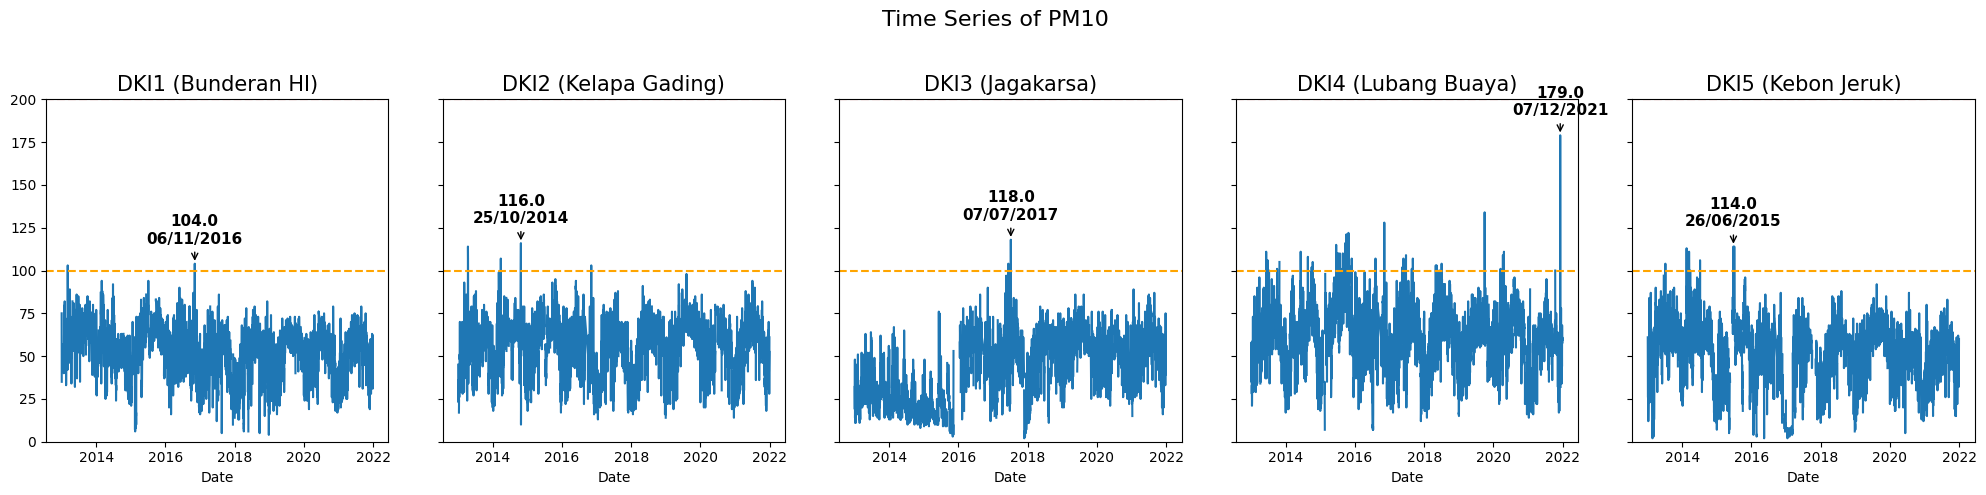

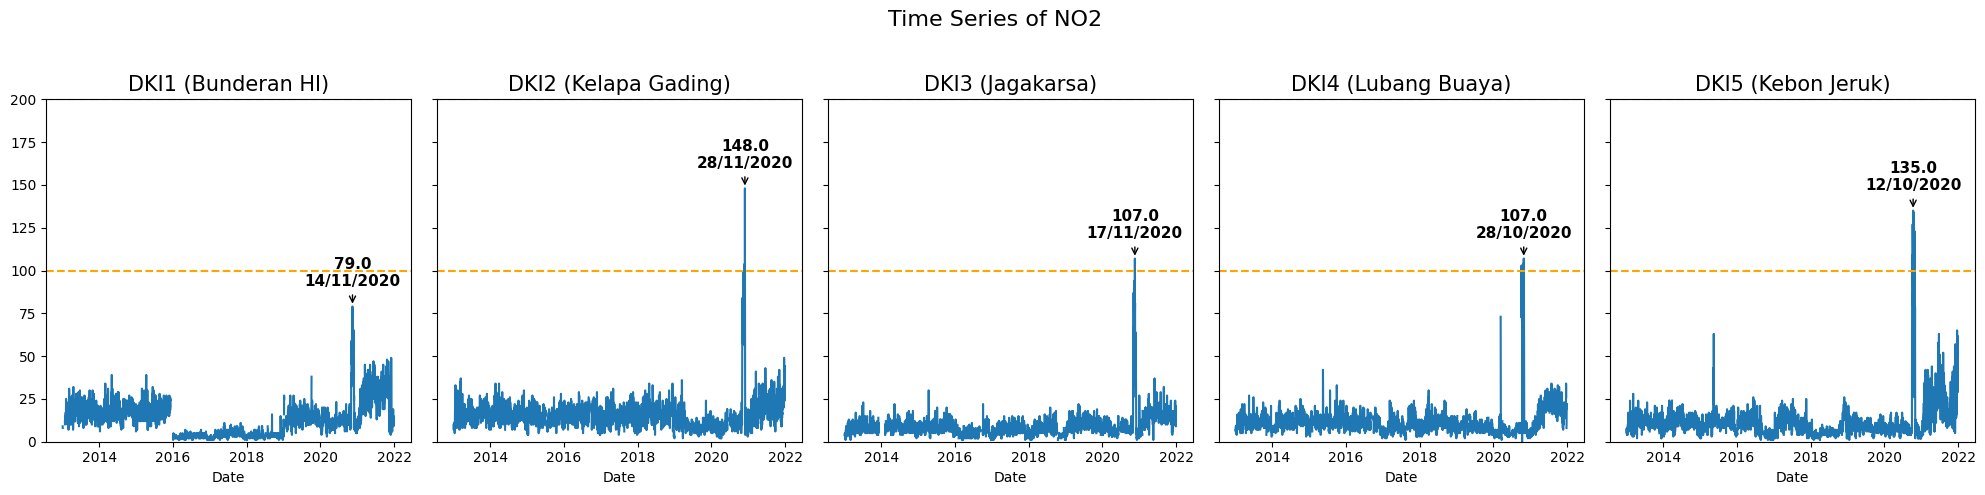

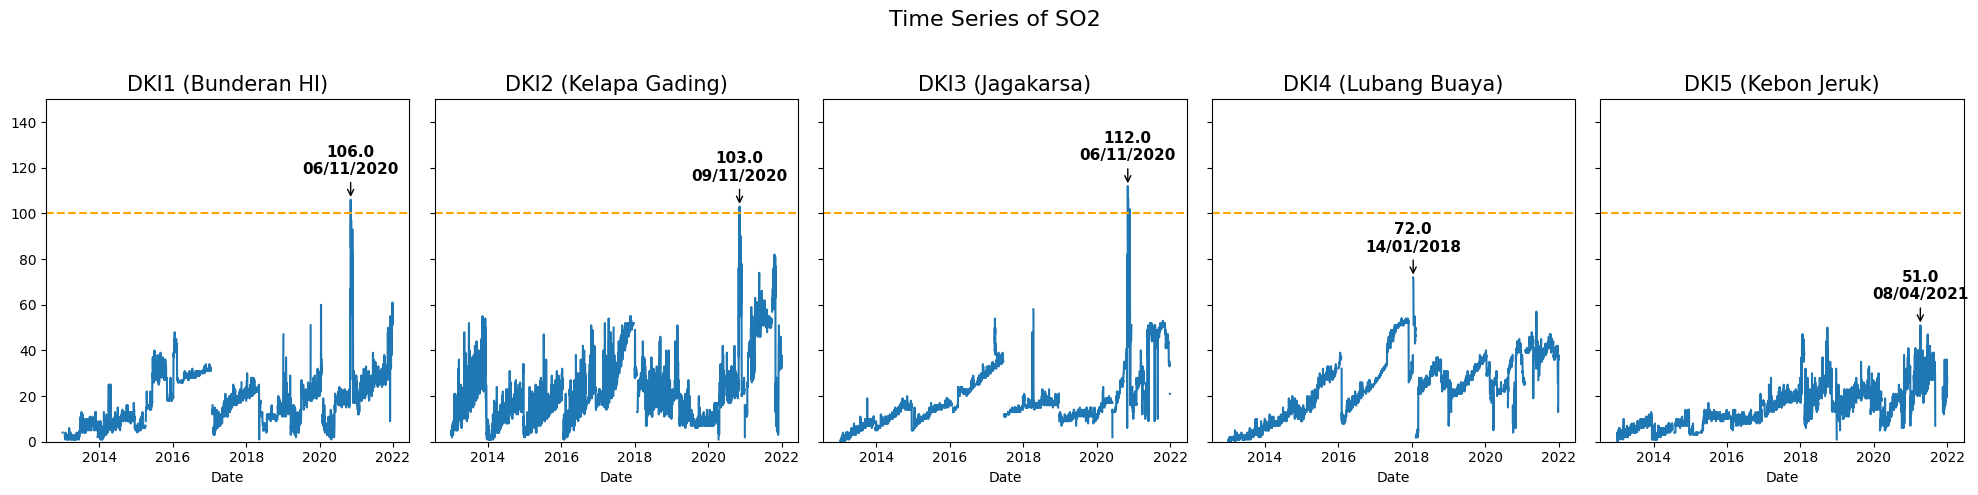

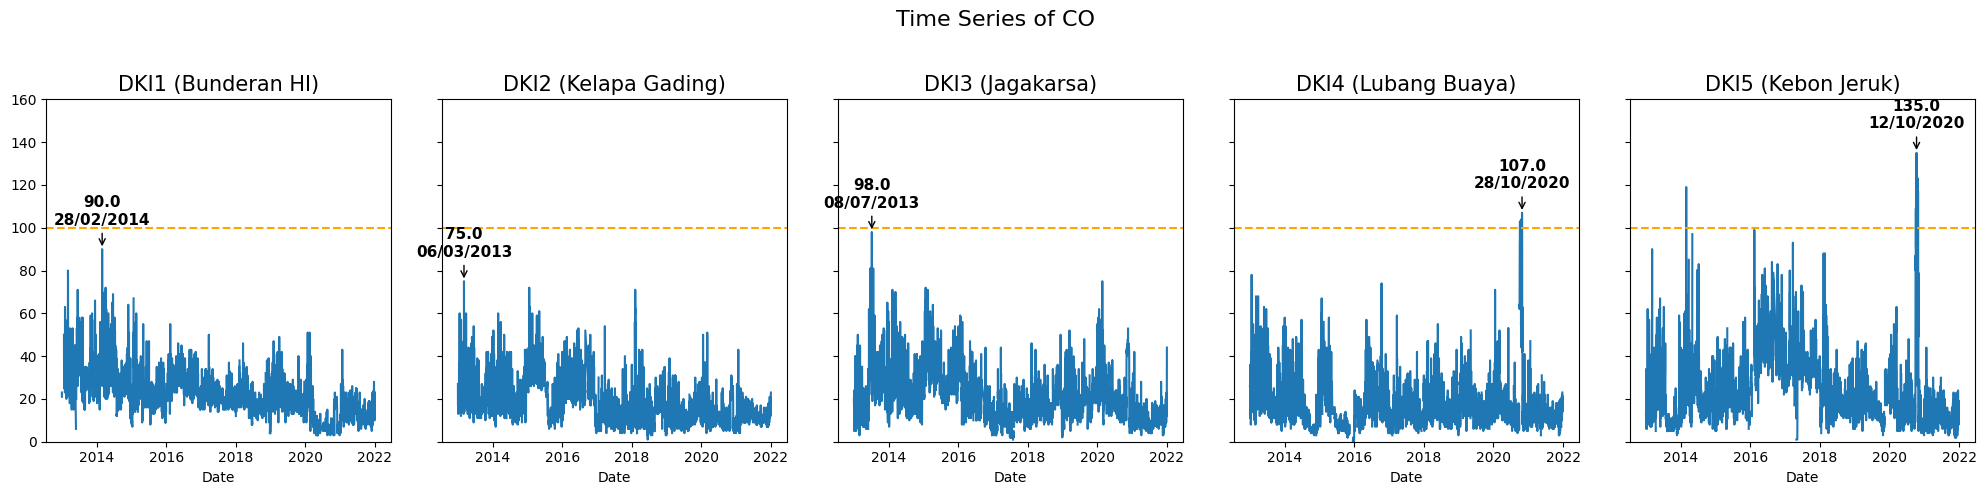

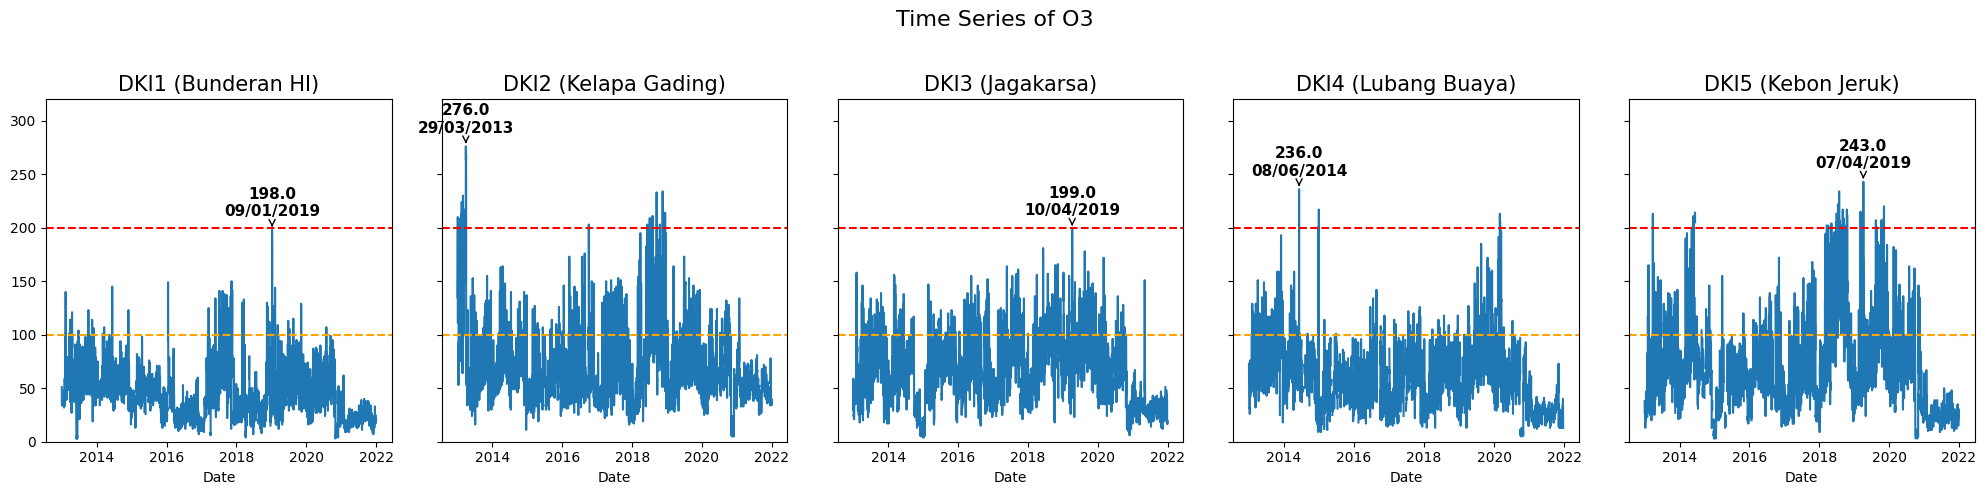

In [17]:
import matplotlib.dates as mdates

spku['tanggal'] = pd.to_datetime(spku['tanggal'], dayfirst=True)

parameters = ['pm10', 'no2', 'so2', 'co', 'o3']
for param in parameters:
    spku[param] = pd.to_numeric(spku[param], errors='coerce')

stations = spku['stasiun'].unique()

# set the y limit for the plot
ymax_values = {
    'pm10': 200,
    'no2': 200,
    'so2': 150,
    'co': 160,
    'o3': 320
}

# Build the plot
for param in parameters:
    fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
    ymin = 0
    ymax = ymax_values[param]

    for i, station in enumerate(stations):
        subset = spku[spku['stasiun'] == station]
        max_value = subset[param].max()

        ax = axes[i]
        ax.plot(subset['tanggal'], subset[param])
        ax.axhline(y=100, color='orange', linestyle='--') # 100 is unhealthy limit
        ax.axhline(y=200, color='red', linestyle='--')  # 200 is very unhealthy limit
        ax.set_title(f'{station}', fontsize=15)  #
        ax.set_xlabel('Date', fontsize=10)
        ax.set_ylim(ymin, ymax)
        ax.xaxis.set_major_locator(mdates.YearLocator(2))

        max_date = subset.loc[subset[param].idxmax(), 'tanggal']
        ax.annotate(f'{max_value}\n{max_date.strftime("%d/%m/%Y")}',
                    xy=(max_date, max_value),
                    xytext=(max_date, max_value + 10),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    verticalalignment='bottom', horizontalalignment='center',
                    fontsize=11,
                    fontweight='bold')

    plt.suptitle(f'Time Series of {param.upper()}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# **Pair Plot to See the Correllation of Each Station**

In [18]:
import pandas as pd

df1 = spku.copy()

for col in ['pm10', 'so2', 'co', 'o3', 'no2']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce').replace(0, pd.NA)

# Combnes pollutants valye into one column for each station and date
df_melted = pd.melt(df1, id_vars=['tanggal', 'stasiun'], value_vars=['pm10', 'so2', 'co', 'o3', 'no2'],
                    var_name='parameter', value_name='nilai')

print(df_melted.head())

# Using pivot table to split each column for each station
df_pivoted = df_melted.pivot_table(index=['tanggal', 'parameter'], columns='stasiun', values='nilai')

df_pivoted = df_pivoted.reset_index()

print(df_pivoted.head())

     tanggal               stasiun parameter nilai
0 2013-01-01    DKI1 (Bunderan HI)      pm10  75.0
1 2013-01-01  DKI2 (Kelapa Gading)      pm10  45.0
2 2013-01-01      DKI3 (Jagakarsa)      pm10  32.0
3 2013-01-01   DKI4 (Lubang Buaya)      pm10  57.0
4 2013-01-01    DKI5 (Kebon Jeruk)      pm10   NaN
stasiun    tanggal parameter DKI1 (Bunderan HI) DKI2 (Kelapa Gading)  \
0       2013-01-01        co               23.0                 27.0   
1       2013-01-01       no2                9.0                 10.0   
2       2013-01-01        o3               51.0                135.0   
3       2013-01-01      pm10               75.0                 45.0   
4       2013-01-01       so2                4.0                  3.0   

stasiun DKI3 (Jagakarsa) DKI4 (Lubang Buaya) DKI5 (Kebon Jeruk)  
0                   20.0                26.0               13.0  
1                    4.0                 7.0                7.0  
2                   30.0                73.0               38.0

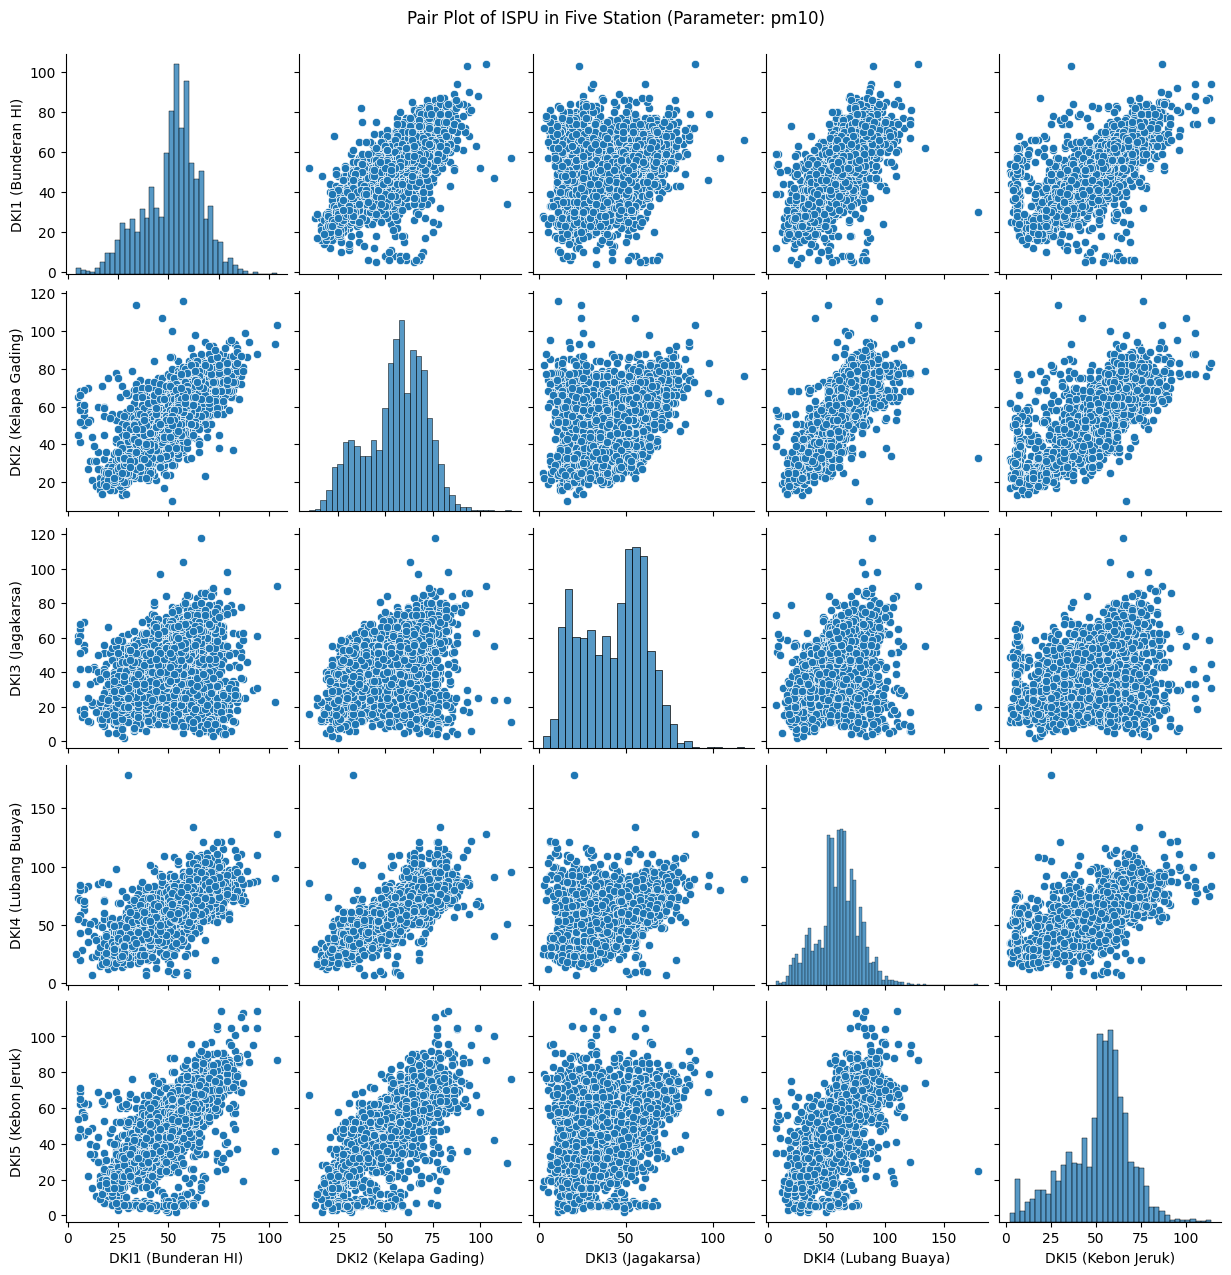

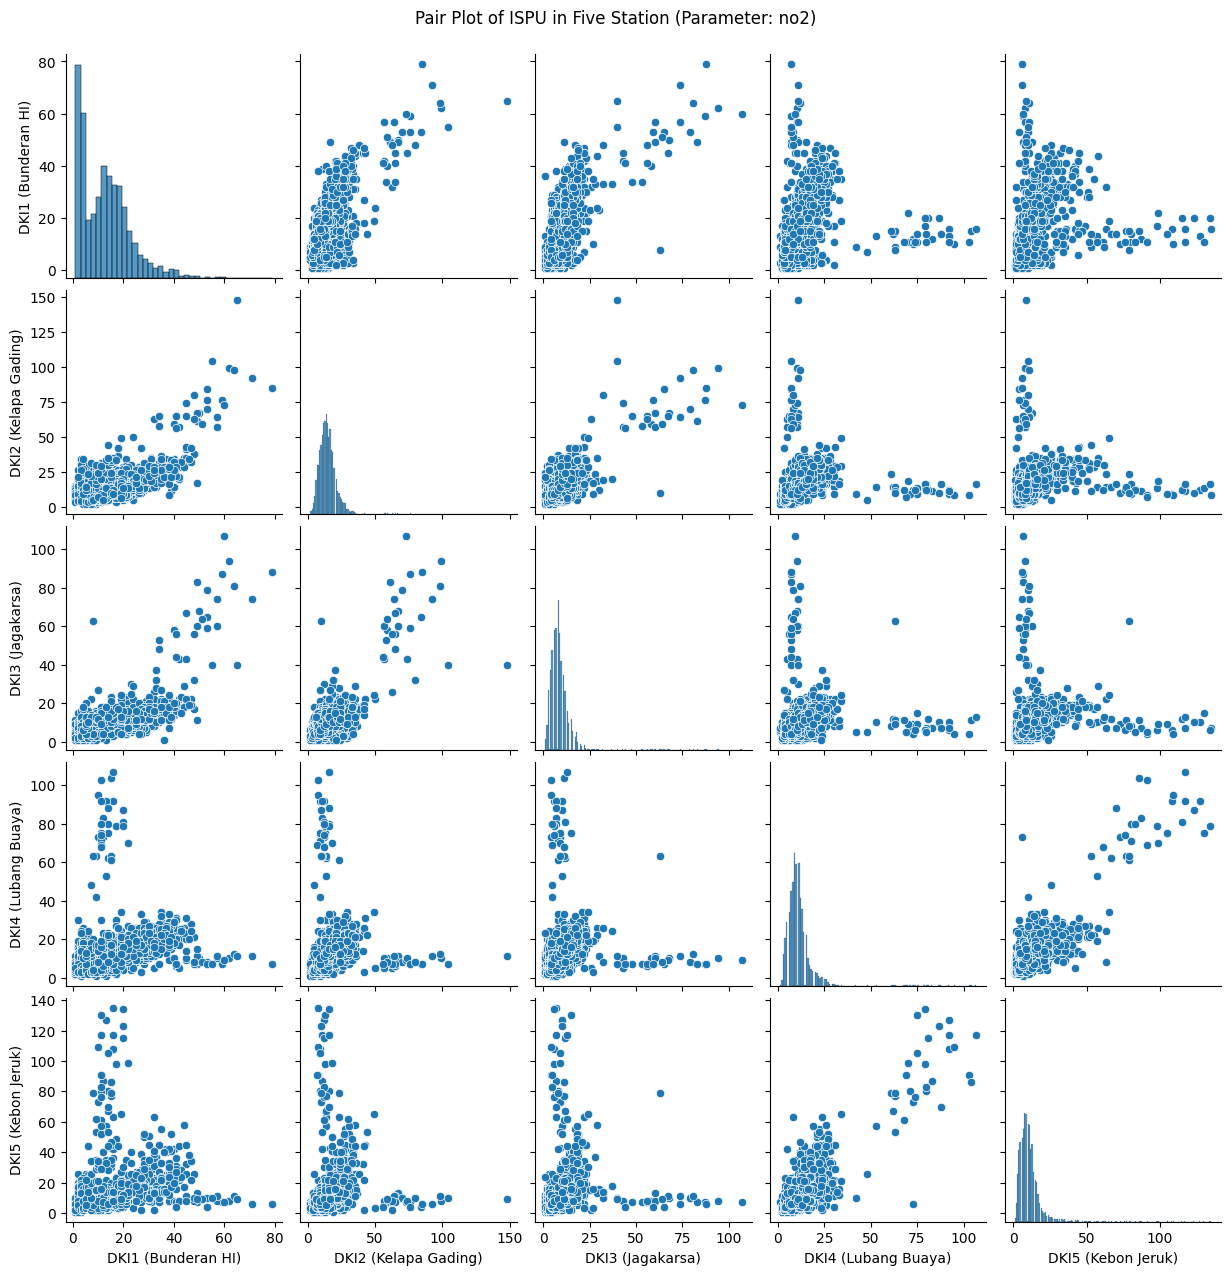

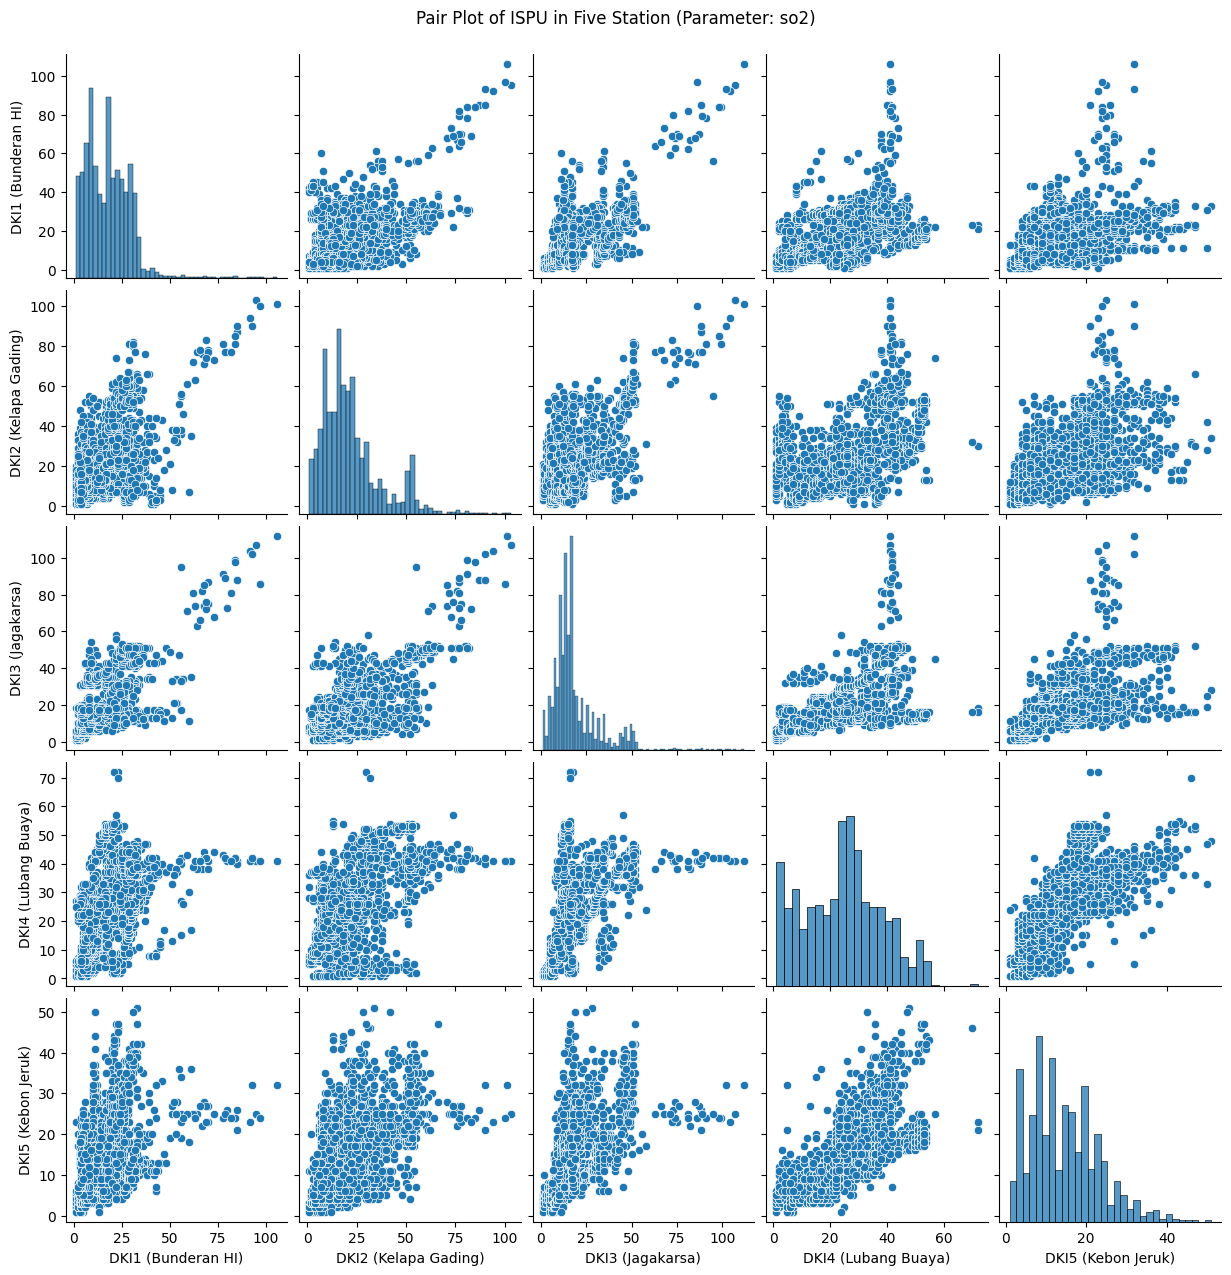

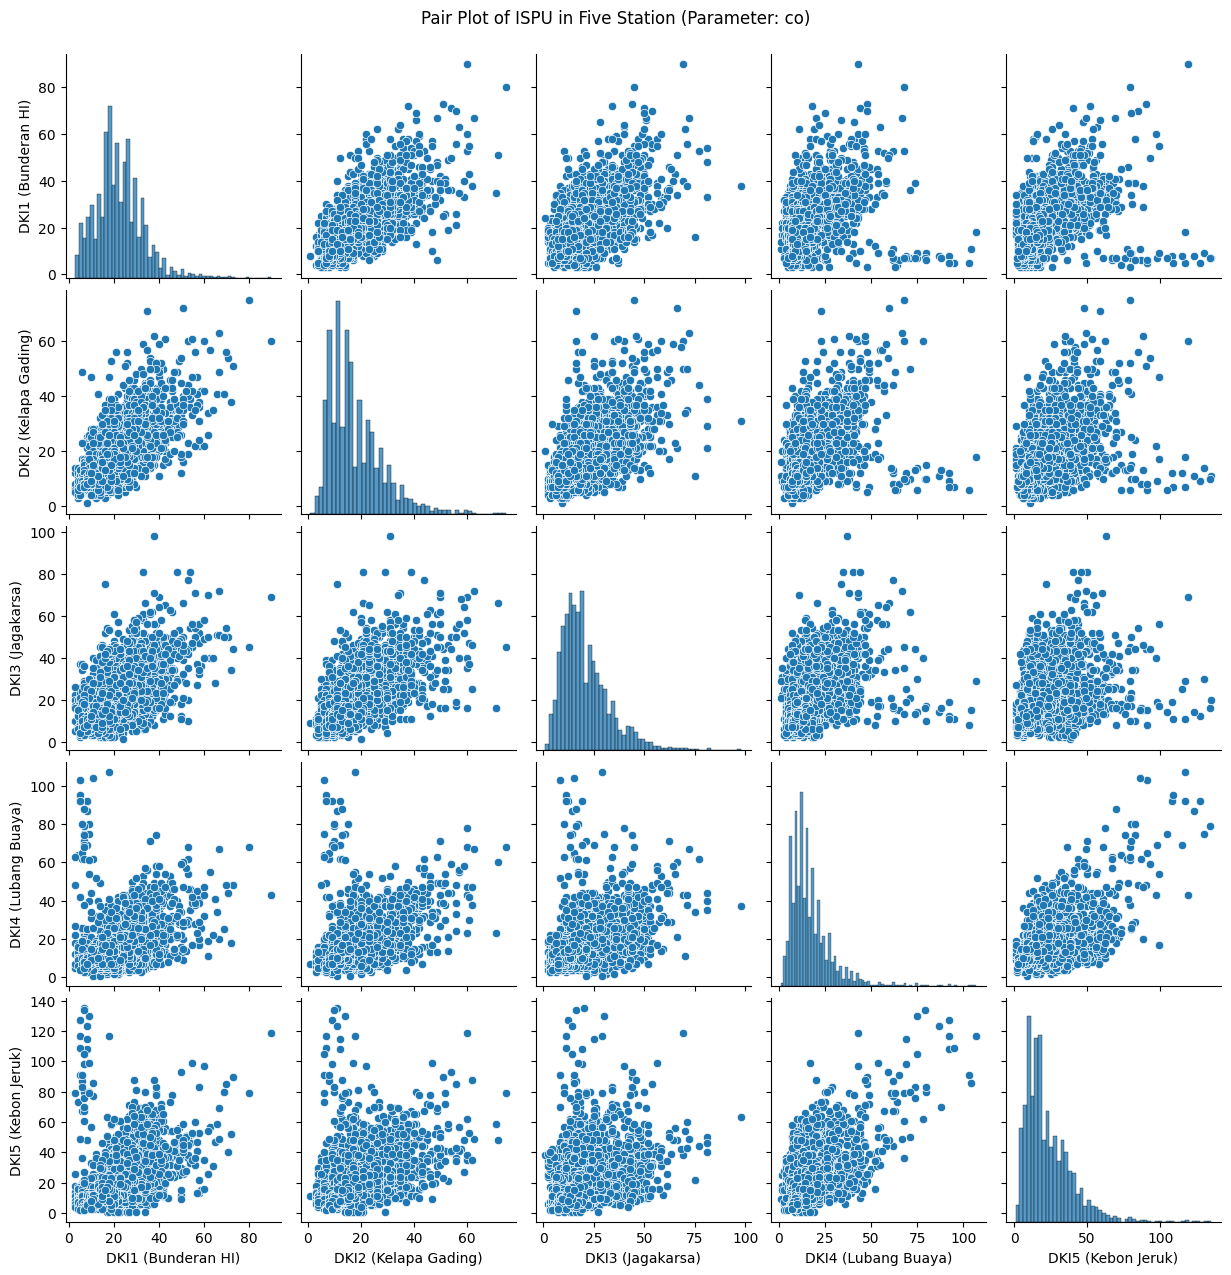

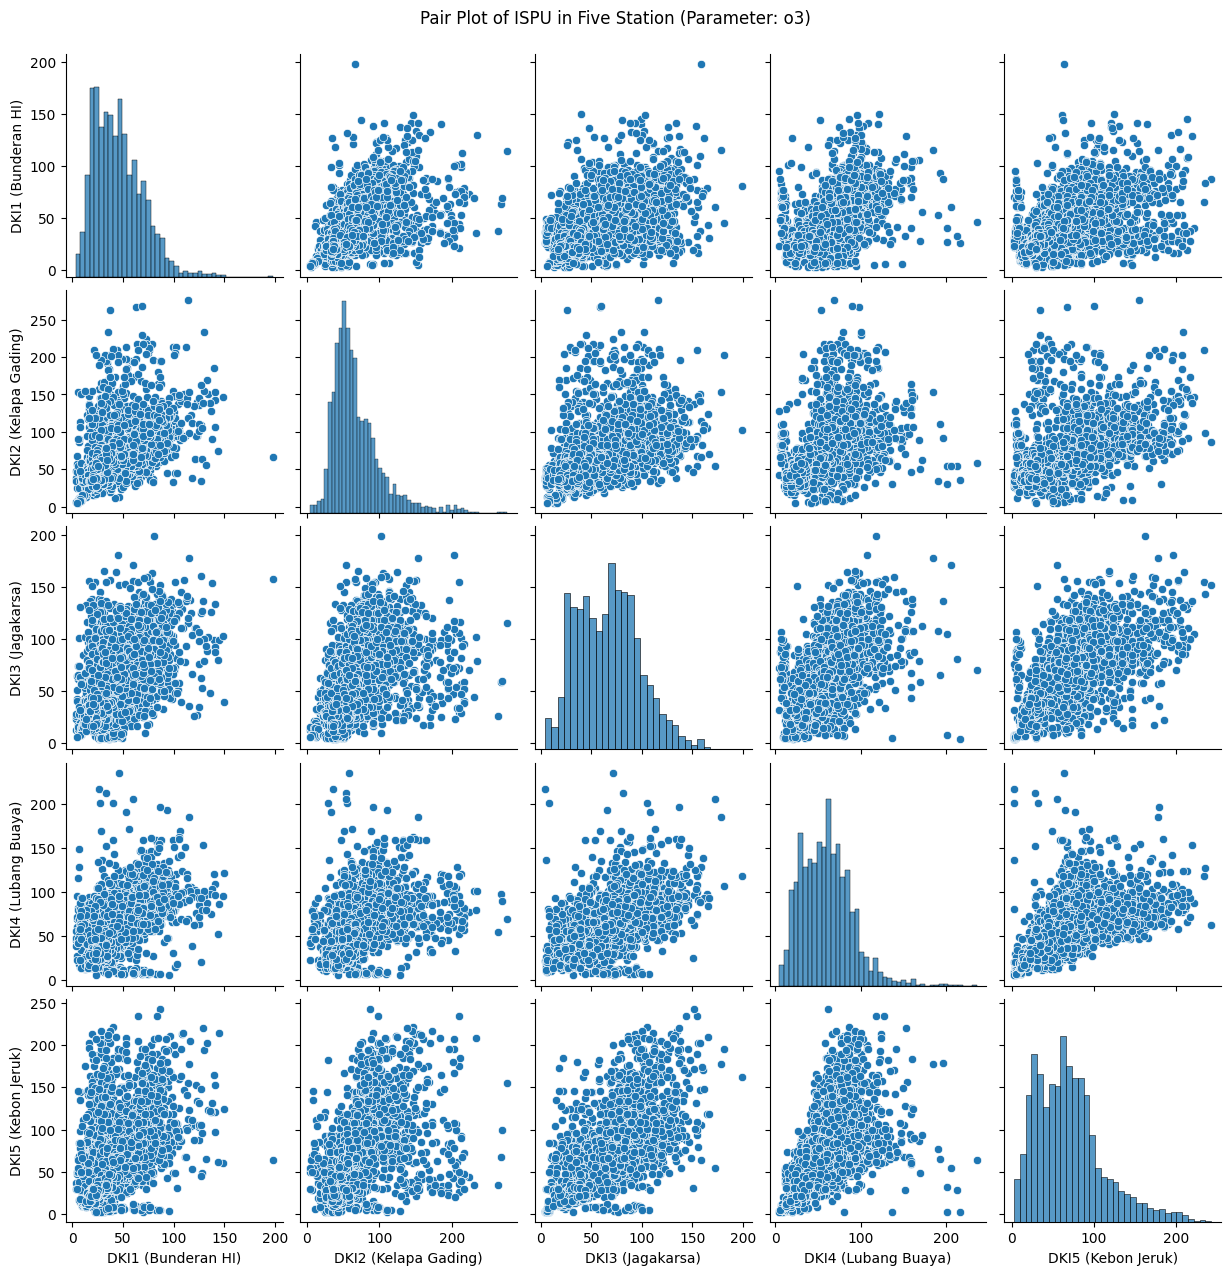

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

parameters = ['pm10', 'no2', 'so2', 'co', 'o3']

# Create separate pair plots for each parameter
for parameter in parameters:
    sns.pairplot(df_pivoted[df_pivoted['parameter'] == parameter])
    plt.suptitle(f'Pair Plot of ISPU in Five Station (Parameter: {parameter})', y=1.02)
    plt.show()

In general, when the ISPU value is low, there is no visible pattern because the data is too spreadout. Several parameters have a diagonal pattern towards the tip right when the ISPU data is quite high, namely exceeding 50. This pattern is clearly visible in NO2 and SO2. In the O3 parameter, there is no visible pattern in the data comparison between one station and another. Some stations have a clear relationship when ISPU data is high, for example between Stations DKI 1 and DKI 2. This pattern can be seen in all four parameters except O3. Then, between DKI 2 and DKI 3 stations, the pattern can be seen in NO2, SO2 and CO. This is shown by the diagonal pattern towards the top right which is visible in the top right plot, namely in the part that shows that the data value is quite high.